# Linear Regression Part I: Data Scrubbing

In the next couple of posts, let's create a linear regression model to predict house prices using the King County House Sales dataset. Following the OSEMN process, we'll start off with scrubbing our data, because real world data is never clean.

Scrubbing Checklist

1) `Null` or missing values: In the world of data, we'd be incredibly fortunate to be provided a complete dataset, and often times, single instances are missing some or most of their attributes.  Since we cannot have `Null` values in our models, we have a couple ways to handle them:

- If an instance/row is missing a significant portion of attributes, we can consider removing it from our dataset-as long as we have enough remaining data.
- If an instance/row is missing only a couple attributes, it can sometimes be too valuable to remove, so we can consider filling the `Null` values with a realistic value, such as the dataset's mean for that attribute.

2) Extreme outliers or impractical values:  Extreme outliers would skew our model's predictions, so we'll want to visualize the distribution of our data, and remove instances of these.  Additionally, sometimes `Null` values are intentionally coded as impractical values (such as -99 in an 'Age' column) because the dataset originally could not have empty values.  We'll want to look for things like this, and consider replacing with the dataset's mean, or another value.

3) Improper typing: Numerical values may be improperly stored as strings, so we'll need to look for these, and re-cast them to their appropriate type.  Additionally, we need look for boolean attributes, and consider how we'll want to use them.

4) Non-Continuous values: Numerical data for our model should be continuous, so we should consider making non-continuous attributes (ex: number of bedrooms) categorical.

Let's get started

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
data = pd.read_csv("kc_house_data.csv", index_col="id") # load the data

In [7]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [9]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
480.0       103
530.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
          ...  
475.0         1
1920.0        1
1930.0        1
2250.0        1
602.0         1
588.0         1
1135.0        1
4820.0        1
2050.0        1
1880.0        1
207.0         1
2240.0        1
20.0          1
861.0         1
506.0         1
1008.0        1
4130.0        1
915.0         1
1990.0        1
1913.0        1
2130.0        1
1852.0        1
374.0         1
1284.0        1
243.0         1
65.0          1
2720.0        1
792.0         1
768.0         1
2360.0        1
Name: sqft_basement, Len

As expected, numbers stored as strings; however, there are some "?" placeholders instead of 0. This '?' might mean that there was no record of the square footage of the basements for these houses but that these houses had basements (thus, purposefully distinguished from 0), or it may mean that this information was not available. Given that it's only a small subset of our data (454), it's safe to clean this up - so let's convert the '?' to 0s and convert the column to a float (possibly an integer, later) for now. 

In [13]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = 0 # convert ? to 0
data.sqft_basement = data.sqft_basement.astype(np.float64) # change from string

### Looking for Null Values

In [14]:
data.isna().sum() # get counts of null values for each column

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

It looks like we have a pretty complete set of data, with most columns having no null values.  Looking at the three columns with missing information (**waterfront, view, & yr_renovated**), it is possible that these are actually boolean representations of these features, so a zero or empty value in yr_renovated might indicate that a house was not renovated, and a zero or missing value in waterfront would indicate that a house did not have a waterfront view, but these assumptions will have to be confirmed. We have 21,597 rows of housing data, and the missing null values in each of these columns is not a great percent of the overall data, so these columns don't need to be dropped (at the moment).

In [15]:
data.yr_renovated.value_counts() # peeking inside yr_renovated

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Let's replace the missing values for the three columns

In [16]:
data.yr_renovated.fillna(0, inplace=True) # replace null values with 0
data.waterfront.fillna(0, inplace=True) # fill null values in waterfront as well
data.view.fillna(0, inplace=True) # fill null values in view as well as there are only 63 missing

In [17]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

For now, this is all the scrubbing we are comfortable doing before exploring our dataset.  Often, after some initial visualizations, we'll have a better understanding of these attributes, and we'll want to come back and change, drop, or categorize attributes.

In the next post, we'll start visualizing our data.

# Linear Regression Part II: EDA & Feature Engineering

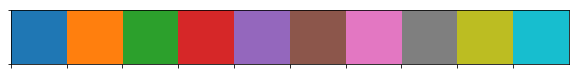

In [18]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

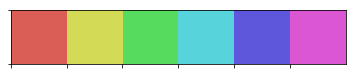

In [19]:
sns.set_palette('hls')
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [59]:
def box_plot_attrs(attrs_array):
    plt.figure(figsize=(16,16))
    num_attrs = len(attrs_array)
    for n in range(1, num_attrs+1):
        subplot_n = 420 + n
        plt.subplot(subplot_n)
        sns.boxplot(x=attrs_array[n-1], data=data)

def box_plot_attr(attr):
    plt.figure(figsize=(16,4))
    plt.subplot(111)
    sns.boxplot(x=attr, data=data)

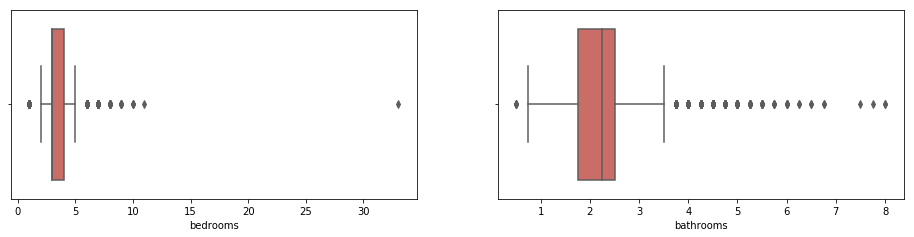

In [50]:
box_plot_attrs(['bedrooms', 'bathrooms'])

We have at least one significant outlier with over 30 bedrooms, and a couple others well above the 75% threshold that contains the rest of the observations. Similarly, we have even more bathroom outliers. These affects the mean and will negatively impact our model, so let's address these outliers:

In [51]:
data = data[data.bathrooms < 6] # removing outliers
data = data[data.bedrooms < 10]

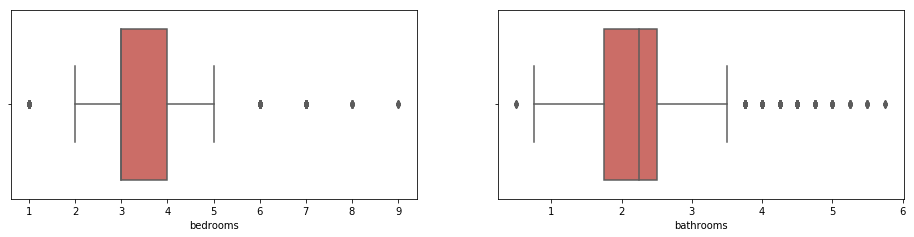

In [52]:
box_plot_attrs(['bedrooms', 'bathrooms'])

In [53]:
data = data[data.bathrooms < 5]
data = data[data.bedrooms < 7]

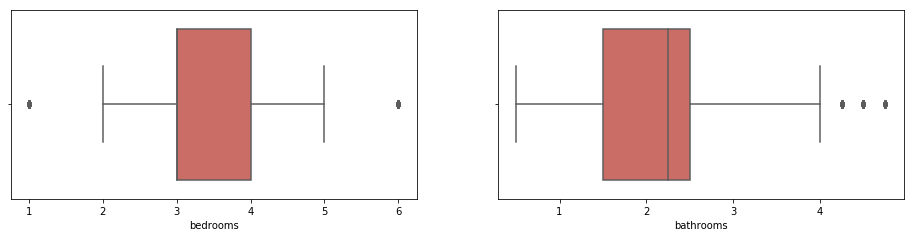

In [54]:
box_plot_attrs(['bedrooms', 'bathrooms'])

Let's move on to square feet:

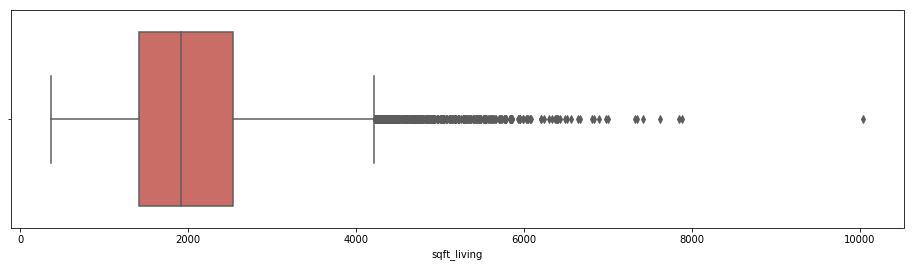

In [57]:
plt.figure(figsize=(16,4))
plt.subplot(111)
sns.boxplot(x='sqft_living', data=data)

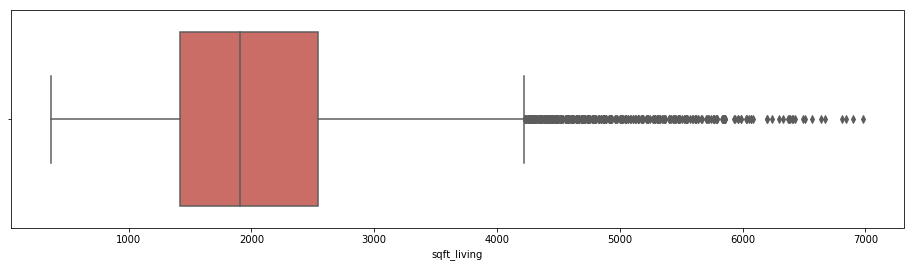

In [60]:
data = data[data.sqft_living < 7000] # removing outliers
box_plot_attr('sqft_living')

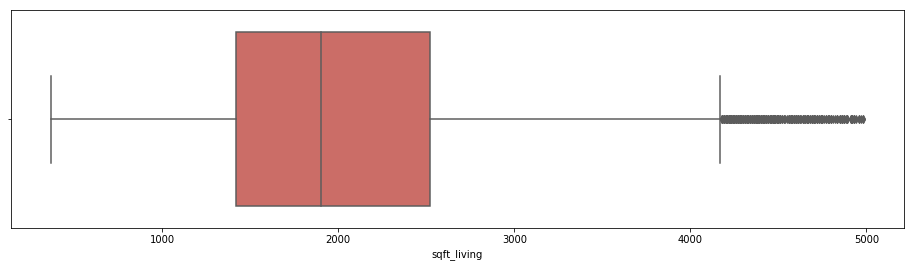

In [62]:
data = data[data.sqft_living < 5000] # removing more outliers
box_plot_attr('sqft_living')

### Price Visualizations

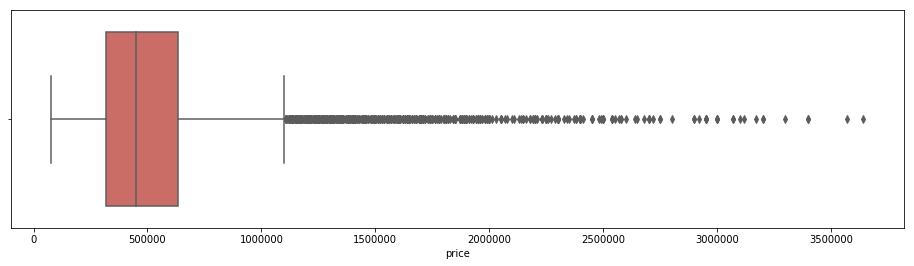

In [63]:
box_plot_attr('price')

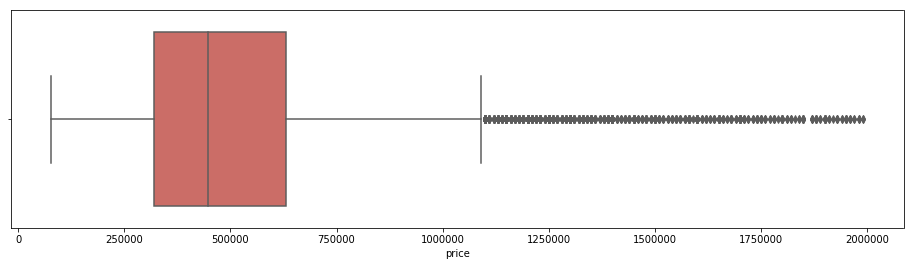

In [64]:
data = data[data.price < 2000000] # removing outliers
box_plot_attr('price')

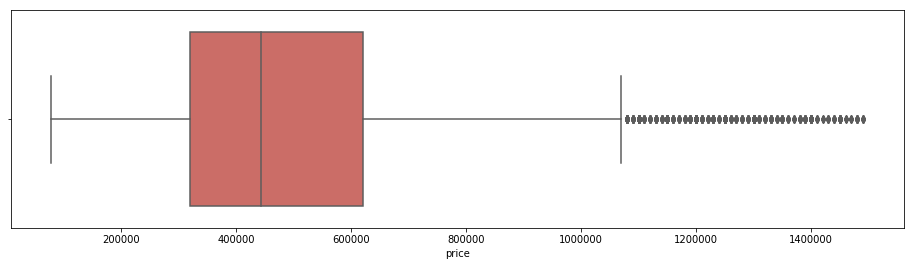

In [65]:
data = data[data.price < 1500000] # removing outliers
box_plot_attr('price')

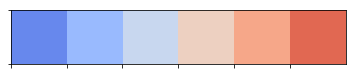

In [68]:
sns.set_palette(sns.color_palette("coolwarm"))
current_palette = sns.color_palette()
sns.palplot(current_palette)

### Multicollinearity

In [69]:
abs(data.corr()) > 0.75 # looking to see if any variables have a correlation >= 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Feature Correlation')

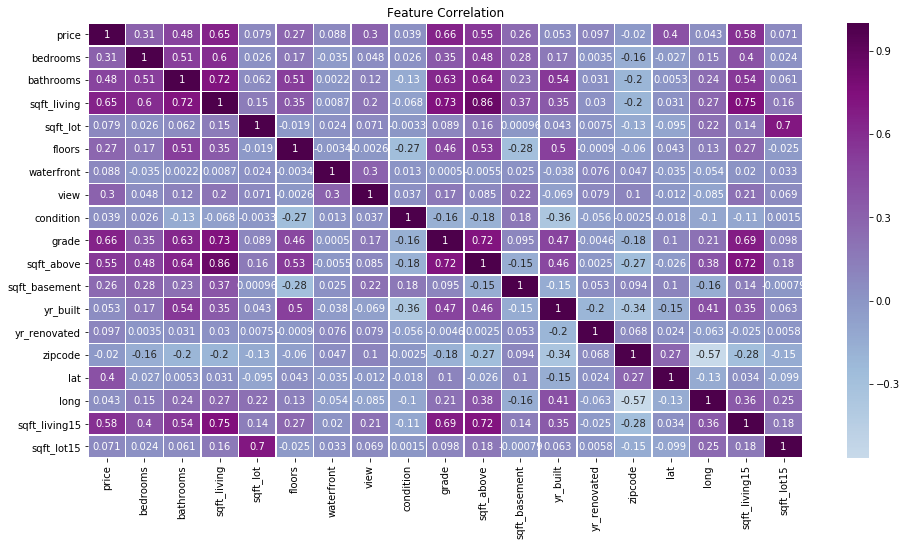

In [71]:
f, ax = plt.subplots(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="BuPu")
plt.title('Feature Correlation')

In [74]:
cols_to_drop = ['date', 'sqft_lot', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
data.drop(cols_to_drop, axis=1, inplace=True)

In [75]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'condition', 'grade', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

### Feature Engineering - Zip Codes

In [76]:
data['price_per_sqft'] = data['price']/data['sqft_living'] # adding price per sqft

In [77]:
data = data.reset_index() # bring back the id column so we can access it
frequency = data.groupby('zipcode').count()['id'] # group zipcodes, and sum up number of sales
mean = data.groupby('zipcode').mean()['price_per_sqft'] # get mean price/sqft for sales
cluster = pd.concat([frequency, mean], axis=1) # combine these
cluster['zipcode'] = cluster.index
cluster.columns = ['frequency', 'price_per_sqft', 'zipcode']
cluster.describe()

,frequency,price_per_sqft,zipcode
count,70.000000,70.000000,70.000000
mean,298.957143,264.494177,98077.300000
std,142.683539,88.109231,56.622408
min,15.000000,148.780767,98001.000000
25%,198.500000,191.688807,98029.250000
50%,274.500000,249.093765,98067.500000
75%,401.250000,311.625193,98117.750000
max,596.000000,541.308882,98199.000000


In [84]:
# creating "cheap" group that sell below mean price/sqft (250)
cluster_cheap = cluster[cluster.price_per_sqft < 250]

# temporary cluster of the houses that sell above mean price/sqft
cluster_temp = cluster[cluster.price_per_sqft >= 250]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 274]

# creating "hhigh volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 274]

In [85]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap.index:
        return 'cheap'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'    

In [86]:
data['zipcode_type'] = data.zipcode.apply(get_zipcode_category)
data.zipcode_type.value_counts() # viewing how our clusters look

cheap                    9710
expensive_high_volume    8542
expensive_low_volume     2675
Name: zipcode_type, dtype: int64

Text(0, 0.5, 'Price')

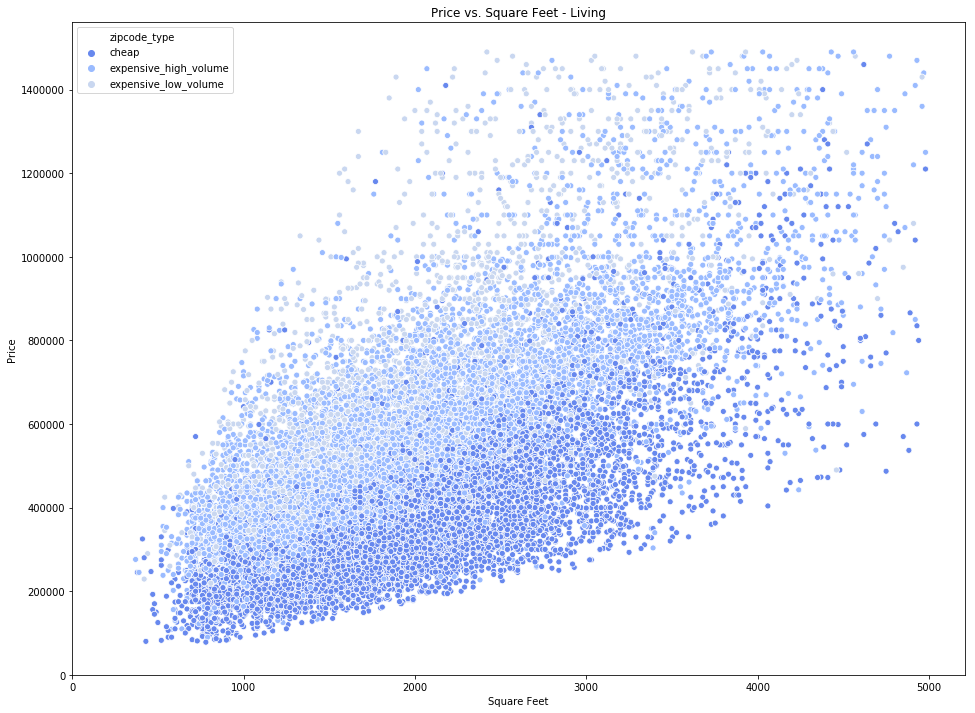

In [87]:
plt.figure(figsize=(16,12))
ax = sns.scatterplot(x="sqft_living", y="price", data=data, hue="zipcode_type")
plt.xlim(0,None)
plt.ylim(0,None)
plt.title("Price vs. Square Feet - Living")
plt.xlabel("Square Feet")
plt.ylabel("Price")

Text(0, 0.5, 'Frequency')

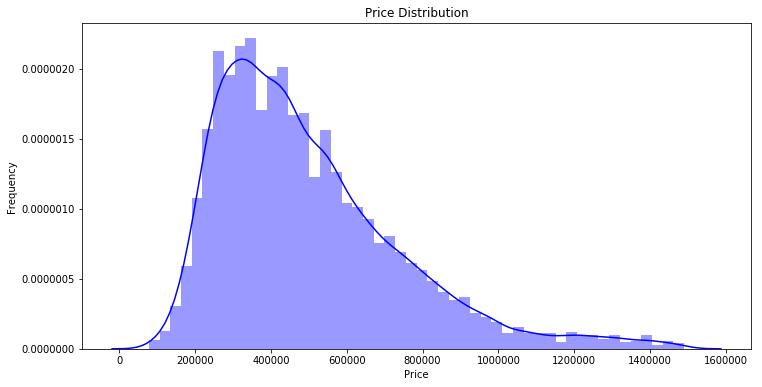

In [95]:
fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(data.price, hist=True, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

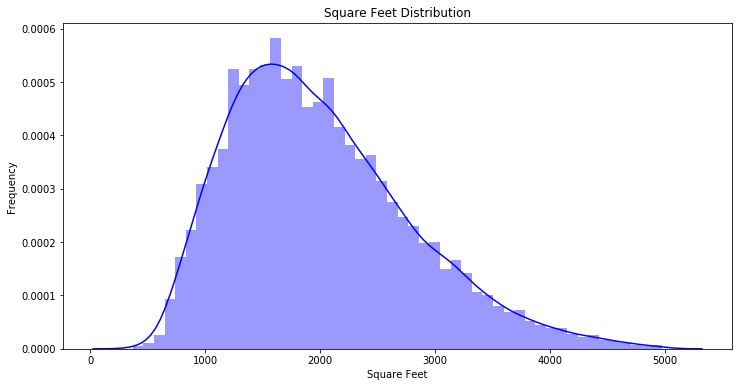

In [93]:
fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(data.sqft_living, hist=True, kde=True, color='blue')
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')

In [96]:
# function that will scale a category that we pass in
def log_transform(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat
  
# normalizing variables by taking log
# log_price = np.log(data['price'])
log_sq_living = np.log(data['sqft_living'])
log_ppsq = np.log(data['price_per_sqft'])

# transforming variables so that they are on the same scale
# data['price'] = log_transform(log_price)
data['sqft_living'] = log_transform(log_sq_living)
data['price_per_sqft'] = log_transform(log_ppsq)

Text(0, 0.5, 'Frequency')

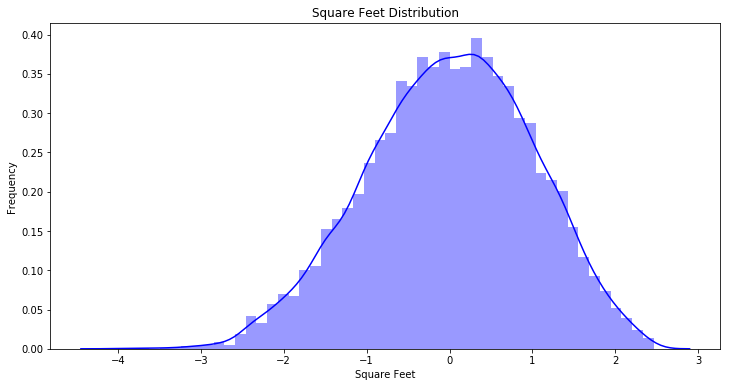

In [97]:
fig = plt.figure(figsize=(12,6))
plt.subplot(111)
sns.distplot(data.sqft_living, hist=True, kde=True, color='blue')
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')

In [98]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'condition', 'grade', 'yr_renovated', 'zipcode', 'lat',
       'long', 'price_per_sqft', 'zipcode_type'],
      dtype='object')

In [99]:
# changing data type to category, then converting

data['bedrooms'] = data['bedrooms'].astype('category')
bedrooms = pd.get_dummies(data['bedrooms'], prefix='br', drop_first=True)

data['bathrooms'] = data['bathrooms'].astype('category')
bathrooms = pd.get_dummies(data['bathrooms'], prefix='bath', drop_first=True)

data['floors'] = data['floors'].astype('category')
floors = pd.get_dummies(data['floors'], prefix='flr', drop_first=True)

data['condition'] = data['condition'].astype('category')
condition = pd.get_dummies(data['condition'], prefix='cd', drop_first=True)

data['grade'] = data['grade'].astype('category')
grade = pd.get_dummies(data['grade'], prefix='grd', drop_first=True)

data['waterfront'] = data['waterfront'].astype('category')
waterfront = pd.get_dummies(data['waterfront'], prefix='wf', drop_first=True)

data['zipcode_type'] = data['zipcode_type'].astype('category')
zip_d = pd.get_dummies(data['zipcode_type'], prefix='zp', drop_first=True)

In [100]:
# adding these new categories to our dataframe
data = pd.concat([data,bedrooms, bathrooms, floors, condition, grade, waterfront, zip_d], axis=1)

In [101]:
# dropping the old columns that contained this information.
data.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront', 'zipcode', 'zipcode_type'], axis=1, inplace=True)

In [102]:
data.describe()

,id,price,sqft_living,yr_renovated,lat,long,price_per_sqft,br_2,br_3,br_4,...,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,wf_1.0,zp_expensive_high_volume,zp_expensive_low_volume
count,2.092700e+04,2.092700e+04,2.092700e+04,20927.000000,20927.000000,20927.000000,2.092700e+04,20927.000000,20927.000000,20927.000000,...,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000
mean,4.594610e+09,4.977999e+05,1.785539e-13,64.275481,47.558555,-122.214053,-9.652420e-15,0.131600,0.464758,0.314617,...,0.097338,0.427199,0.287714,0.119606,0.044297,0.010178,0.000765,0.003488,0.408181,0.127825
std,2.878765e+09,2.435648e+05,1.000024e+00,352.358642,0.139862,0.141590,1.000024e+00,0.338064,0.498768,0.464374,...,0.296425,0.494683,0.452708,0.324508,0.205759,0.100375,0.027641,0.058960,0.491509,0.333903
min,1.000102e+06,7.800000e+04,-4.010423e+00,0.000000,47.155900,-122.519000,-2.638329e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.125059e+09,3.190000e+05,-6.806214e-01,0.000000,47.465550,-122.330000,-7.403931e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.905040e+09,4.430000e+05,3.540049e-02,0.000000,47.569300,-122.232000,2.089526e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.334601e+09,6.200000e+05,7.248025e-01,0.000000,47.679000,-122.124000,6.855380e-01,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.900000e+09,1.490000e+06,2.460017e+00,2015.000000,47.777600,-121.315000,3.176868e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
data.drop(['yr_renovated', 'lat', 'long', 'id', 'price_per_sqft'], axis=1, inplace=True)
data.describe()

,price,sqft_living,br_2,br_3,br_4,br_5,br_6,bath_0.75,bath_1.0,bath_1.25,...,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,wf_1.0,zp_expensive_high_volume,zp_expensive_low_volume
count,2.092700e+04,2.092700e+04,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,...,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000,20927.000000
mean,4.977999e+05,1.785539e-13,0.131600,0.464758,0.314617,0.068667,0.010991,0.003393,0.183973,0.000430,...,0.097338,0.427199,0.287714,0.119606,0.044297,0.010178,0.000765,0.003488,0.408181,0.127825
std,2.435648e+05,1.000024e+00,0.338064,0.498768,0.464374,0.252894,0.104261,0.058150,0.387471,0.020734,...,0.296425,0.494683,0.452708,0.324508,0.205759,0.100375,0.027641,0.058960,0.491509,0.333903
min,7.800000e+04,-4.010423e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.190000e+05,-6.806214e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.430000e+05,3.540049e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.200000e+05,7.248025e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.490000e+06,2.460017e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
data.columns

Index(['price', 'sqft_living', 'br_2', 'br_3', 'br_4', 'br_5', 'br_6',
       'bath_0.75', 'bath_1.0', 'bath_1.25', 'bath_1.5', 'bath_1.75',
       'bath_2.0', 'bath_2.25', 'bath_2.5', 'bath_2.75', 'bath_3.0',
       'bath_3.25', 'bath_3.5', 'bath_3.75', 'bath_4.0', 'bath_4.25',
       'bath_4.5', 'bath_4.75', 'flr_1.5', 'flr_2.0', 'flr_2.5', 'flr_3.0',
       'flr_3.5', 'cd_2', 'cd_3', 'cd_4', 'cd_5', 'grd_4', 'grd_5', 'grd_6',
       'grd_7', 'grd_8', 'grd_9', 'grd_10', 'grd_11', 'grd_12', 'wf_1.0',
       'zp_expensive_high_volume', 'zp_expensive_low_volume'],
      dtype='object')

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

In [109]:
linreg = LinearRegression()

# our feature variables
X = data.drop(['price'], axis=1)

# our target variable
y = data['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [110]:
# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 15961504908.78
Test Mean Squared Error: 16072331490.73
R Squared: 0.731
Mean Absolute Error: 93030.56
Root Mean Squared Error: 126776.7
Average Predicted Price: 491465.77
Average Actual Price: 491504.26
Difference: -38.49


### Stepwise Feature Selection

In [112]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [113]:
# iterating through our initial feature variables to see if we can remove any with high p-values
result=stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)

Add  grd_7                          with p-value 0.0
Add  zp_expensive_low_volume        with p-value 0.0
Add  grd_6                          with p-value 0.0
Add  zp_expensive_high_volume       with p-value 0.0
Add  grd_11                         with p-value 0.0
Add  grd_8                          with p-value 0.0
Add  grd_5                          with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grd_9                          with p-value 1.85913e-90
Add  wf_1.0                         with p-value 9.67989e-94
Add  cd_5                           with p-value 7.95696e-90
Add  bath_2.5                       with p-value 4.7928e-49
Add  bath_1.0                       with p-value 1.485e-32
Add  flr_1.5                        with p-value 6.0985e-25
Add  grd_12                         with p-value 2.45914e-21
Add  cd_4                           with p-value 7.82098e-19
Add  grd_10                         with p-value 1.84496e-14
Drop grd_8                     

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Add  br_2                           with p-value 1.14565e-11
Add  bath_3.75                      with p-value 1.72584e-11
Add  bath_3.5                       with p-value 1.54286e-09
Add  bath_3.25                      with p-value 2.38387e-08
Add  bath_4.0                       with p-value 4.7736e-07
Add  flr_3.0                        with p-value 8.8146e-07
Add  flr_2.5                        with p-value 0.000562303
Add  bath_4.25                      with p-value 0.000740275
Add  bath_2.75                      with p-value 0.00533249
Add  bath_3.0                       with p-value 0.00114867
Add  flr_2.0                        with p-value 0.00201025
Add  bath_4.5                       with p-value 0.00312328
Add  br_6                           with p-value 0.00693693
Add  br_5                           with p-value 0.0057648
Add  br_4                           with p-value 0.00382629
Add  br_3                           with p-value 2.32764e-08
Add  cd_3                         

In [114]:
stepwise_features = ['grd_7', 'zp_expensive_low_volume', 
                     'grd_6', 'zp_expensive_high_volume', 
                     'grd_11', 'grd_5', 'sqft_living', 'grd_9', 
                     'wf_1.0', 'cd_5', 'bath_2.5', 'bath_1.0', 
                     'flr_1.5', 'grd_12', 'cd_4', 'grd_10', 'br_2', 
                     'bath_3.75', 'bath_3.5', 'bath_3.25', 'bath_4.0', 
                     'flr_3.0', 'flr_2.5', 'bath_4.25', 'bath_2.75', 'bath_3.0', 
                     'flr_2.0', 'bath_4.5', 'br_6', 'br_5', 'br_4', 'br_3', 'cd_3']

original_features_count = len(X.columns)
stepwise_features_count = len(stepwise_features)
print("Original # of Feature Variables: ", original_features_count)
print("Selected # of Feature Variables: ", stepwise_features_count)
print("# of Feature Variables Removed: ", original_features_count - stepwise_features_count)

Original # of Feature Variables:  44
Selected # of Feature Variables:  33
# of Feature Variables Removed:  11


### Model Iteration #2

In [115]:
# select only the features from our original dataset
X_new = X[stepwise_features]

linreg = LinearRegression()

# our target variable
y = data['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X_new,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

Train Mean Squared Error: 15967588684.99
Test Mean Squared Error: 16071611702.05
R Squared: 0.73
Mean Absolute Error: 93007.49
Root Mean Squared Error: 126773.86
Average Predicted Price: 491435.74
Average Actual Price: 491504.26
Difference: -68.52


In [116]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20927 entries, 0 to 20926
Data columns (total 33 columns):
grd_7                       20927 non-null uint8
zp_expensive_low_volume     20927 non-null uint8
grd_6                       20927 non-null uint8
zp_expensive_high_volume    20927 non-null uint8
grd_11                      20927 non-null uint8
grd_5                       20927 non-null uint8
sqft_living                 20927 non-null float64
grd_9                       20927 non-null uint8
wf_1.0                      20927 non-null uint8
cd_5                        20927 non-null uint8
bath_2.5                    20927 non-null uint8
bath_1.0                    20927 non-null uint8
flr_1.5                     20927 non-null uint8
grd_12                      20927 non-null uint8
cd_4                        20927 non-null uint8
grd_10                      20927 non-null uint8
br_2                        20927 non-null uint8
bath_3.75                   20927 non-null uint8
bath_3.

In [117]:
# import necessary library
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# cross validation score of negative mean squared error
neg_mse_score = cross_val_score(linreg, X_new, y, cv=15, scoring='neg_mean_squared_error')
print("Cross Validation Score (Negative Mean Square Error)")
print(neg_mse_score)
print("*_*_*_*_*_*_*_*_")

# cross validation score of r squared
r2_score = cross_val_score(linreg, X_new, y, cv=15, scoring="r2")
r2_score_print = round(sum(r2_score)/len(r2_score),2)*100
print("Cross Validation Score (R Squared)")
print(r2_score)
print("*_*_*_*_*_*_*_*_")
print('Model Accuracy')
print(r2_score_print)

Cross Validation Score (Negative Mean Square Error)
[-1.62022601e+10 -1.55271643e+10 -1.69021054e+10 -1.75890281e+10
 -1.49675075e+10 -1.76407062e+10 -1.60363830e+10 -1.63965493e+10
 -1.53999337e+10 -1.45272983e+10 -1.61248324e+10 -1.74482965e+10
 -1.72114627e+10 -1.65069972e+10 -1.27145665e+10]
*_*_*_*_*_*_*_*_
Cross Validation Score (R Squared)
[0.72641466 0.73337331 0.71790856 0.70340752 0.74133677 0.70807796
 0.71897073 0.71722079 0.75050712 0.72176977 0.73881587 0.7327531
 0.70095975 0.73656267 0.77256769]
*_*_*_*_*_*_*_*_
Model Accuracy
73.0
